gerekli kütüphaneler

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

veri setini Yükleme

In [3]:
DATASET_PATH = "C://Users//Nurgul//Documents//classification//animals"
selected_classes = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]
IMAGE_SIZE = (128, 128)
IMAGES_PER_CLASS = 650

verilerin hazırlanması

In [4]:
def load_and_prepare_data():
    images = []
    labels = []

    for idx, animal_class in enumerate(selected_classes):
        class_path = os.path.join(DATASET_PATH, animal_class)
        image_files = os.listdir(class_path)[:IMAGES_PER_CLASS]

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            image_resized = cv2.resize(image, IMAGE_SIZE)
            image_normalized = image_resized / 255.0
            images.append(image_normalized)
            labels.append(idx)

    return np.array(images), np.array(labels)

X, y = load_and_prepare_data()
y = to_categorical(y, num_classes=len(selected_classes))

eğitim ve test verilerinin ayrılması

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

veri artırma

In [6]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

CNN modeli 

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(selected_classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Nurgul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model eğitimi

In [9]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=100)

Epoch 1/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 221ms/step - accuracy: 0.2405 - loss: 2.0389 - val_accuracy: 0.3569 - val_loss: 1.7992
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 226ms/step - accuracy: 0.3351 - loss: 1.8592 - val_accuracy: 0.4497 - val_loss: 1.6207
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 227ms/step - accuracy: 0.3853 - loss: 1.7307 - val_accuracy: 0.4405 - val_loss: 1.5328
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 229ms/step - accuracy: 0.4122 - loss: 1.6757 - val_accuracy: 0.5015 - val_loss: 1.4438
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 231ms/step - accuracy: 0.4352 - loss: 1.6039 - val_accuracy: 0.5523 - val_loss: 1.3233
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 233ms/step - accuracy: 0.4711 - loss: 1.5405 - val_accuracy: 0.5400 - val_loss: 1.3525
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 236ms/step - accuracy: 0.4853 - loss: 1.4931 - val_accuracy: 0.5754 - val_loss: 1.2620
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 35s 241ms/step - accuracy: 0.4961 -

model testi

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7496 - loss: 0.7690
Test Accuracy: 75.59%


veri manipülasyonu

In [15]:
def get_manipulated_images(images):
    manipulated_images = []
    for img in images:
        manipulated_img = cv2.convertScaleAbs(img, alpha=1.5, beta=30)  # Örnek manipülasyon
        manipulated_images.append(manipulated_img)
    return np.array(manipulated_images)

X_test_manipulated = get_manipulated_images(X_test)
loss, manipulated_accuracy = model.evaluate(X_test_manipulated, y_test)
print(f"Manipulated Test Accuracy: {manipulated_accuracy * 100:.2f}%")

61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0985 - loss: 137.7171
Manipulated Test Accuracy: 10.05%


renk sabitliği

In [16]:
def get_wb_images(images):
    wb_images = []
    for img in images:
        lab = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        l = cv2.equalizeHist(l)
        lab = cv2.merge((l, a, b))
        wb_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB) / 255.0
        wb_images.append(wb_img)
    return np.array(wb_images)

X_test_wb = get_wb_images(X_test_manipulated)
loss, wb_accuracy = model.evaluate(X_test_wb, y_test)
print(f"White-Balanced Test Accuracy: {wb_accuracy * 100:.2f}%")

61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.1218 - loss: 27.2583
White-Balanced Test Accuracy: 11.79%


In [18]:
print("Accuracy Comparison:")
print(f"Original Test Accuracy: {accuracy * 100:.2f}%")
print(f"Manipulated Test Accuracy: {manipulated_accuracy * 100:.2f}%")
print(f"White-Balanced Test Accuracy: {wb_accuracy * 100:.2f}%")

Accuracy Comparison:
Original Test Accuracy: 75.59%
Manipulated Test Accuracy: 10.05%
White-Balanced Test Accuracy: 11.79%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


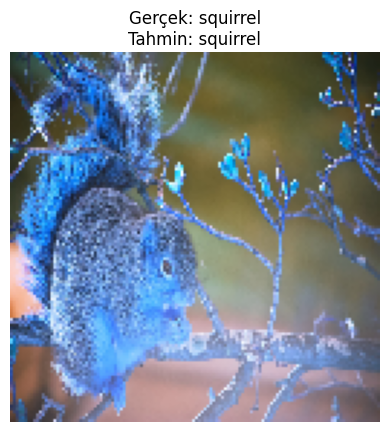

In [21]:
import random

def show_random_test_sample():
    random_idx = random.randint(0, len(X_test) - 1)
    sample_image = X_test[random_idx]
    true_label = np.argmax(y_test[random_idx])
    predicted_label = np.argmax(model.predict(sample_image[np.newaxis, ...]))

    plt.imshow(sample_image)
    plt.title(f"Gerçek: {selected_classes[true_label]}\nTahmin: {selected_classes[predicted_label]}")
    plt.axis('off')
    plt.show()

show_random_test_sample()